<a href="https://colab.research.google.com/github/ranggakd/AIly/blob/main/projects/Rating_System_is_not_Credible_Anymore_So_I_Propose_a_New_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
[![Open Medium](https://gist.githubusercontent.com/ranggakd/34926ba72fa0b0c17566b0b2a52296de/raw/90dde15647e4d3e6d292f2a95612cb3bd428dcf3/medium.svg)](https://medium.com/@ranggakd/fantastic-docs-and-where-to-find-them-27357e23429)

This notebook is Google Colab compatible. More explanation available on Medium.

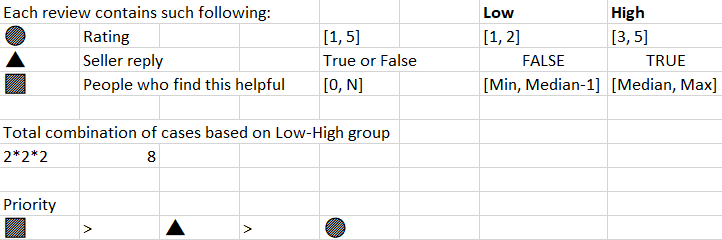

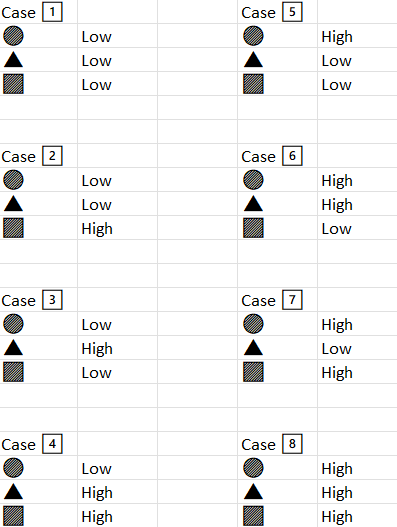

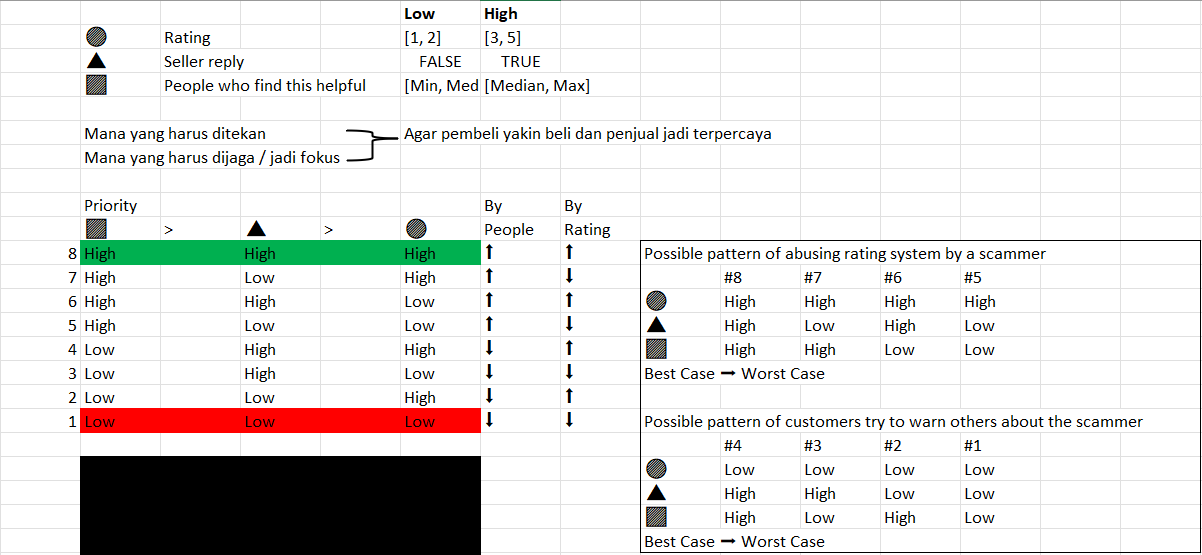

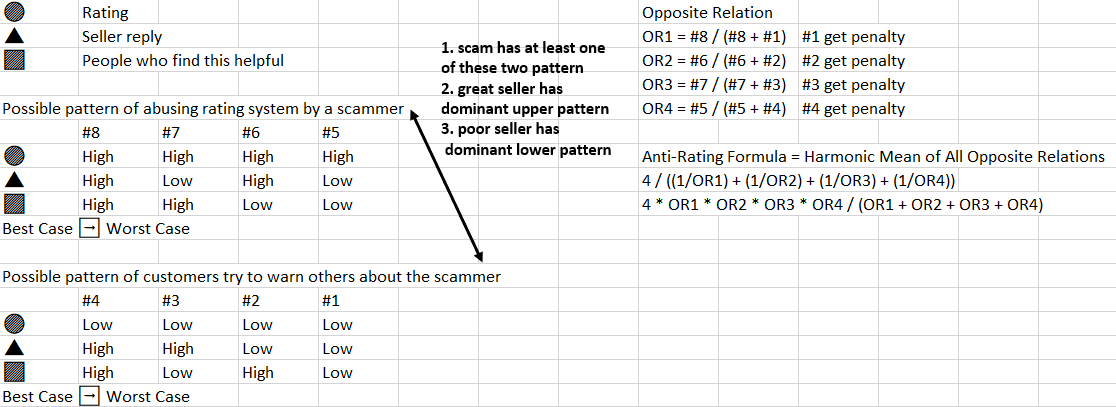

In [1]:
import pandas as pd

In [2]:
o_url = 'https://github.com/ranggakd/AIly/raw/main/datasets/original_review.csv'
s_url = 'https://github.com/ranggakd/AIly/raw/main/datasets/scam_review.csv'
original = pd.read_csv(o_url)
scam = pd.read_csv(s_url)

In [3]:
original.head()

,rating,helpful_feedback,is_seller_reply
0,5,0,True
1,4,1,True
2,5,0,True
3,4,1,True
4,5,0,True


In [4]:
scam.head()

,rating,helpful_feedback,is_seller_reply
0,4,21,True
1,5,2,False
2,5,3,True
3,5,4,True
4,4,0,True


In [5]:
original['helpful_feedback'].describe()

count    239.000000
mean       0.200837
std        1.178162
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       13.000000
Name: helpful_feedback, dtype: float64

In [6]:
low = (original['rating'] < 3)
high = ~low
original.loc[low, 'rating'] = False
original.loc[high, 'rating'] = True

low = (original['helpful_feedback'] < 1)
high = ~low
original.loc[low, 'helpful_feedback'] = False
original.loc[high, 'helpful_feedback'] = True

original.head()

,rating,helpful_feedback,is_seller_reply
0,True,False,True
1,True,True,True
2,True,False,True
3,True,True,True
4,True,False,True


In [7]:
scam['helpful_feedback'].describe()

count    604.000000
mean       0.793046
std        3.019322
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       34.000000
Name: helpful_feedback, dtype: float64

In [8]:
low = (scam['rating'] < 3)
high = ~low
scam.loc[low, 'rating'] = False
scam.loc[high, 'rating'] = True

low = (scam['helpful_feedback'] < 1)
high = ~low
scam.loc[low, 'helpful_feedback'] = False
scam.loc[high, 'helpful_feedback'] = True

scam.head()

,rating,helpful_feedback,is_seller_reply
0,True,True,True
1,True,True,False
2,True,True,True
3,True,True,True
4,True,False,True


In [9]:
col = ['rating', 'is_seller_reply', 'helpful_feedback']
original = original.reindex(columns=col)
scam = scam.reindex(columns=col)

In [10]:
original.head()

,rating,is_seller_reply,helpful_feedback
0,True,True,False
1,True,True,True
2,True,True,False
3,True,True,True
4,True,True,False


In [11]:
scam.head()

,rating,is_seller_reply,helpful_feedback
0,True,True,True
1,True,False,True
2,True,True,True
3,True,True,True
4,True,True,False


In [12]:
def get_cases(a, b, c):
    return int(f'{int(a)}{int(b)}{int(c)}', base=2)

get_cases(True, False, True)

5

In [13]:
cases = []
for _, (r, isr, hf) in original.iterrows():
    cases.append(get_cases(r, isr, hf))
original = original.assign(case=cases)
original['case'].value_counts()

6    214
7     22
2      2
3      1
Name: case, dtype: int64

In [14]:
original

,rating,is_seller_reply,helpful_feedback,case
0,True,True,False,6
1,True,True,True,7
2,True,True,False,6
3,True,True,True,7
4,True,True,False,6
...,...,...,...,...
234,True,True,False,6
235,True,True,False,6
236,True,True,False,6
237,True,True,False,6


In [15]:
cases = []
for _, (r, isr, hf) in scam.iterrows():
    cases.append(get_cases(r, isr, hf))
scam = scam.assign(case=cases)
scam['case'].value_counts()

6    432
1     96
4     20
5     17
0     17
3     13
7      6
2      3
Name: case, dtype: int64

In [16]:
scam

,rating,is_seller_reply,helpful_feedback,case
0,True,True,True,7
1,True,False,True,5
2,True,True,True,7
3,True,True,True,7
4,True,True,False,6
...,...,...,...,...
599,True,True,False,6
600,True,True,False,6
601,True,True,False,6
602,True,True,False,6


In [17]:
from functools import reduce

def final_result(a,b,c,d):
    compute = [x for x in [a,b,c,d] if x!=0]
    m = reduce(lambda x, y: x*y, compute)
    s = sum(compute)
    return len(compute)*m/s

def anti_rating_formula(dict):
    op = {
        1:0,
        2:0,
        3:0,
        4:0,
        5:0,
        6:0,
        7:0,
        8:0
    }
    for k, v in dict.items():
        op.update({k:v})
    or1 = op[8] / (op[8]+op[1]) if op[8]+op[1]!=0 else 0
    or2 = op[6] / (op[6]+op[2]) if op[6]+op[2]!=0 else 0
    or3 = op[7] / (op[7]+op[3]) if op[7]+op[3]!=0 else 0
    or4 = op[5] / (op[5]+op[4]) if op[5]+op[4]!=0 else 0
    print(or1,or2,or3,or4)
    return final_result(or1,or2,or3,or4)

original tends to have higher score

In [18]:
cases = original['case'].value_counts().to_dict()
cases


{2: 2, 3: 1, 6: 214, 7: 22}

In [19]:
anti_rating_formula(cases)

0 0.9907407407407407 0.9565217391304348 0


0.973330576803804

scam tends to have lower score

In [20]:
cases = scam['case'].value_counts().to_dict()
cases

{0: 17, 1: 96, 2: 3, 3: 13, 4: 20, 5: 17, 6: 432, 7: 6}

In [21]:
anti_rating_formula(cases)

0.0 0.993103448275862 0.3157894736842105 0.4594594594594595


0.244450978325391

TO_DO: collect another edge cases